<a href="https://colab.research.google.com/github/Rhayem1920/Support-Vector-machines-/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A Support Vector Machine (SVM)** is a very powerful and versatile Machine Learning
model, capable of performing linear or nonlinear classification, regression, and even
outlier detection. It is one of the most popular models in Machine Learning, and any‐
one interested in Machine Learning should have it in their toolbox. SVMs are partic‐
ularly well suited for classification of complex but small- or medium-sized datasets.

In [ ]:
import sys 
assert sys.version_info >(3,5)
import sklearn 
assert sklearn.__version__>="0.20"

 # common libraries for data engineering and machine learning tasks

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
 # ignore warnings
    
import warnings
warnings.filterwarnings('ignore')

# rectifying visualistaion's parameters to have pretty plots
font={'size': 14,
        'weight' : 'bold',
        'family':'monospace'} # weight could be book,bold etc ...
mpl.rc('font',**font)
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('lines',linewidth=5,c='black')
plt.rcParams["figure.figsize"] = (6,6)
sns.set_style('darkgrid')
# # saving visualisation function :
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join('/home/dhia/Pictures/', fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# **Linear SVM classification** 
 The fundamental idea behind SVMs is best explained with some pictures :
 

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC 
iris=datasets.load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svc_clf=SVC(kernel='linear',C=float('inf'))
svc_clf.fit(X,y)
print(svc_clf.intercept_,svc_clf.coef_)
svc_clf.support_vectors_

[-3.78823471] [[1.29411744 0.82352928]]


array([[1.9, 0.4],
       [3. , 1.1]])

In [ ]:
# decision boundary function

def plot_decision_boundary(svc_clf,xmin,xmax):
  x0=np.linspace(xmin,xmax,200)
  w=svc_clf.coef_[0]
  b=svc_clf.intercept_[0]
  y=-w[0]/w[1] * x0- b/w[1]
  margin=1/w[1]
  bound_up=y+margin
  bound_down=y-margin
  
  plt.plot(x0,y,'k-')
  plt.plot(x0,bound_up,'b--',linewidth=1)
  plt.plot(x0,bound_down,'r--',linewidth=1)

  

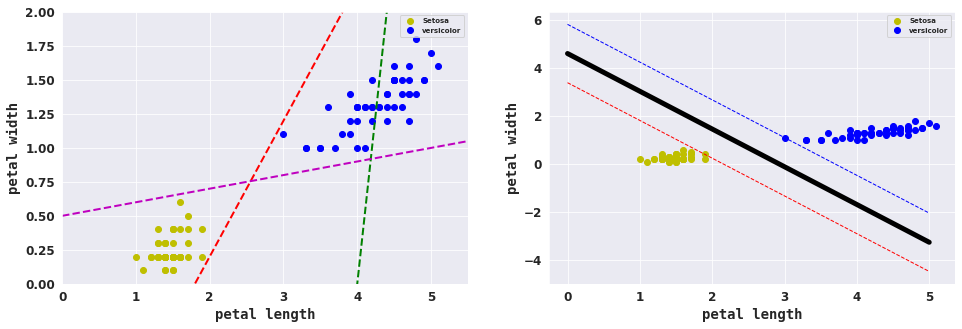

In [ ]:
fig,axes=plt.subplots(ncols=2,sharey=False,squeeze=True,figsize=(16,5))
# the left plot
plt.sca(axes[0])
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',label='Setosa')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bo',label='versicolor')
plt.xlabel('petal length',fontdict=font)
plt.ylabel('petal width',fontdict=font)
plt.legend(loc='best',fontsize=7)
##### plot the bad models :
x0=np.linspace(0,5.5,200)
dec_bound_1=5*x0 - 20
dec_bound_2=x0-1.8
dec_bound_3=0.1*x0+0.5
plt.plot(x0,dec_bound_1,'g--',linewidth=2)
plt.plot(x0,dec_bound_2,'r--',linewidth=2)
plt.plot(x0,dec_bound_3,'m--',linewidth=2)
plt.axis([0,5.5,0,2])

# the right plot
plt.sca(axes[1])
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',label='Setosa')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bo',label='versicolor')
plt.xlabel('petal length',fontdict=font)
plt.legend(loc='best',fontsize=7)
plt.ylabel('petal width',fontdict=font)
plot_decision_boundary(svc_clf,0,5)



The two
classes can clearly be separated easily with a straight line (they are linearly separable).
The left plot shows the decision boundaries of three possible linear classifiers. The
model whose decision boundary is represented by the dashed line is so bad that it
does not even separate the classes properly. The other two models work perfectly on
this training set, but their decision boundaries come so close to the instances that
these models will probably not perform as well on new instances. In contrast, the
solid line in the plot on the right represents the decision boundary of an SVM classi‐
fier; this line not only separates the two classes but also stays as far away from the
closest training instances as possible. You can think of an SVM classifier as fitting the
155widest possible street (represented by the parallel dashed lines) between the classes.
This is called large margin classification.
Notice that adding more training instances “off the street” will not affect the decision
boundary at all: it is fully determined (or “supported”) by the instances located on the
edge of the street. These instances are called the support vectors

### Scaling impact:Sensitivity to feature scales



In [ ]:
data=np.array([[1,50],[5,20],[3,80],[5,60]]).astype(np.float64)
target=np.array([0,0,1,1])
svc_classifier=SVC(kernel='linear',C=100)
svc_classifier.fit(data,target)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

No handles with labels found to put in legend.


(-2.0, 2.0, -2.0, 2.0)

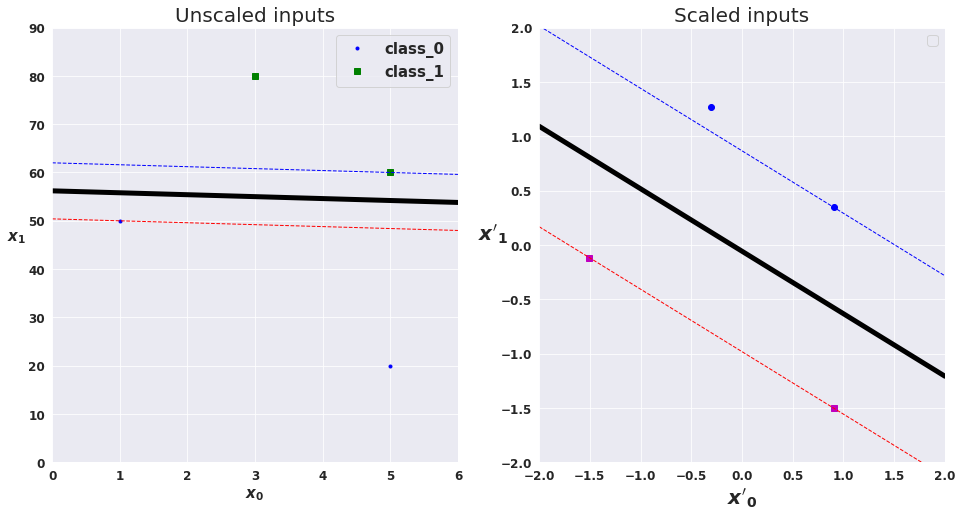

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(data[:,0][target==0],data[:,1][target==0],'b.',label='class_0')
plt.plot(data[:,0][target==1],data[:,1][target==1],'gs',label='class_1')
plot_decision_boundary(svc_classifier,0,6)
plt.legend(loc='best',fontsize=15)
plt.xlabel("$x_0$", fontsize=15)
plt.ylabel("$x_1$    ", fontsize=15, rotation=0)
plt.title("Unscaled inputs", fontsize=20)
plt.axis([0, 6, 0, 90])
plt.subplot(122)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(data)
svc_classifier.fit(X_scaled,target)
plt.plot(X_scaled[:, 0][target==1], X_scaled[:, 1][target==1], "bo")
plt.plot(X_scaled[:, 0][target==0], X_scaled[:, 1][target==0], "ms")
plot_decision_boundary(svc_classifier,-2,2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled inputs", fontsize=20)
plt.legend(loc='best')
plt.axis([-2, 2, -2, 2])

**SVMs are sensitive to the feature scales, as you can see in
Figure 5-2: on the left plot, the vertical scale is much larger than the
horizontal scale, so the widest possible street is close to horizontal.
After feature scaling (e.g., using Scikit-Learn’s StandardScaler ),
the decision boundary looks much better (on the right plot)**.

### Hard Margin Sensitivity to Outliers
If we strictly impose that all instances be off the street and on the right side, this is
called hard margin classification. There are two main issues with hard margin classifi‐
cation. First, it only works if the data is linearly separable, and second it is quite sensi‐
tive to outliers. Figure 5-3 shows the iris dataset with just one additional outlier: on
the left, it is impossible to find a hard margin, and on the right the decision boundary
ends up very different from the one we saw in Figure 5-1 without the outlier, and it
will probably not generalize as well.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'petal width')

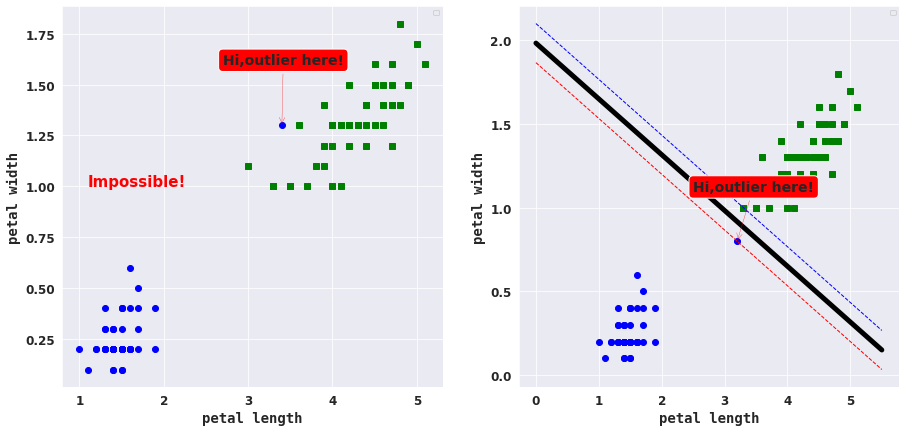

In [ ]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
fig,axes=plt.subplots(ncols=2, figsize=(15,7))
plt.sca(axes[0])
X_with_outlier1=np.concatenate([X,X_outliers[:1]],axis=0,)
y_with_outlier1=np.concatenate([y,y_outliers[:1]],axis=0)
plt.plot(X_with_outlier1[:,0][y_with_outlier1==0],X_with_outlier1[:,1][y_with_outlier1==0],'bo')
plt.plot(X_with_outlier1[:,0][y_with_outlier1==1],X_with_outlier1[:,1][y_with_outlier1==1],'gs')
plt.annotate('Hi,outlier here!',xy=(X_outliers[0][0],X_outliers[0][1]),xytext=(X_outliers[0][0]-0.7,X_outliers[0][1]+0.3),fontsize=14,
                   arrowprops=dict(arrowstyle='->',ec='red',lw=0.3),bbox=dict(boxstyle="round",fc='red'))
plt.text(1.1, 1.0, "Impossible!", fontsize=15, color="red")
plt.xlabel('petal length',fontdict=font)
plt.legend(loc='best',fontsize=7)
plt.ylabel('petal width',fontdict=font)
plt.sca(axes[1])
X_with_outlier2=np.concatenate([X,X_outliers[1:]],axis=0,)
y_with_outlier2=np.concatenate([y,y_outliers[1:]],axis=0)
plt.plot(X_with_outlier2[:,0][y_with_outlier2==0],X_with_outlier2[:,1][y_with_outlier2==0],'bo')
plt.plot(X_with_outlier2[:,0][y_with_outlier2==1],X_with_outlier2[:,1][y_with_outlier2==1],'gs')
plt.annotate('Hi,outlier here!',xy=(X_outliers[1][0],X_outliers[1][1]),xytext=(X_outliers[1][0]-0.7,X_outliers[1][1]+0.3),fontsize=14,
                   arrowprops=dict(arrowstyle='->',ec='red',lw=0.3),bbox=dict(boxstyle="round",fc='red'))
svc=SVC(kernel='linear',C=10**9)
svc.fit(X_with_outlier2,y_with_outlier2)
plot_decision_boundary(svc,0,5.5)
plt.xlabel('petal length',fontdict=font)
plt.legend(loc='best',fontsize=7)
plt.ylabel('petal width',fontdict=font)

### Soft Margin Classification:
To avoid these issues it is preferable to use a more flexible model. The objective is to
find a good balance between keeping the street as large as possible and limiting the
margin violations (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called **soft margin classification.**
In Scikit-Learn’s SVM classes, you can control this balance using the C hyperparame‐
ter: a smaller C value leads to a wider street but more margin violations. Figure 5-4
shows the decision boundaries and margins of two soft margin SVM classifiers on a
nonlinearly separable dataset. On the left, using a low C value the margin is quite
large, but many instances end up on the street. On the right, using a high C value the
classifier makes fewer margin violations but ends up with a smaller margin. However,
it seems likely that the first classifier will generalize better: in fact even on this train‐
ing set it makes fewer prediction errors, since most of the margin violations are
actually on the correct side of the decision boundary.

**N.B: If your SVM model is overfitting, you can try regularizing it by
reducing C**

In [ ]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
classifier=Pipeline([("scaler",StandardScaler()),
                     ("linear_classifier",LinearSVC(C=1,loss='hinge',random_state=42))])
classifier.fit(X,y)
classifier.predict([[5.5,1.7]])


array([1.])

In [ ]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

(4.0, 5.9, 0.8, 2.8)

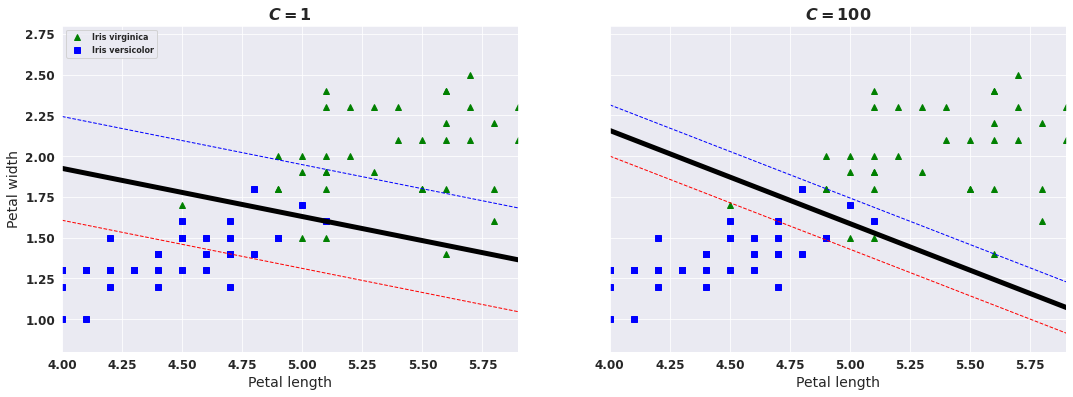

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(18,6), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=8)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])



Alternatively, you could use the SVC class, using SVC(kernel="linear", C=1) , but it
is much slower, especially with large training sets, so it is not recommended. Another
option is to use the SGDClassifier class, with SGDClassifier(loss="hinge",
alpha=1/(m*C)) . This applies regular Stochastic Gradient Descent (see Chapter 4) to
train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it
can be useful to handle huge datasets that do not fit in memory (out-of-core train‐
ing), or to handle online classification tasks.


**The LinearSVC** class regularizes the bias term, so you should center
the training set first by subtracting its mean. This is automatic if
you scale the data using the StandardScaler . Moreover, make sure
you set the loss hyperparameter to "hinge" , as it is not the default
value. Finally, for better performance you should set the dual
hyperparameter to False , unless there are more features than
training instances

## Nonlinear SVM Classification
 Although linear SVM classifiers are efficient and work surprisingly well in many
cases, many datasets are not even close to being linearly separable. One approach to
handling nonlinear datasets is to add more features, such as polynomial features (as
you did in Chapter 4); in some cases this can result in a linearly separable dataset.
Consider the left plot in Figure 5-5: it represents a simple dataset with just one feature
x 1 . This dataset is not linearly separable, as you can see. But if you add a second fea‐
ture x2 = (x1)² , the resulting 2D dataset is perfectly linearly separable.

(-4.5, 4.5, -1.0, 17.0)

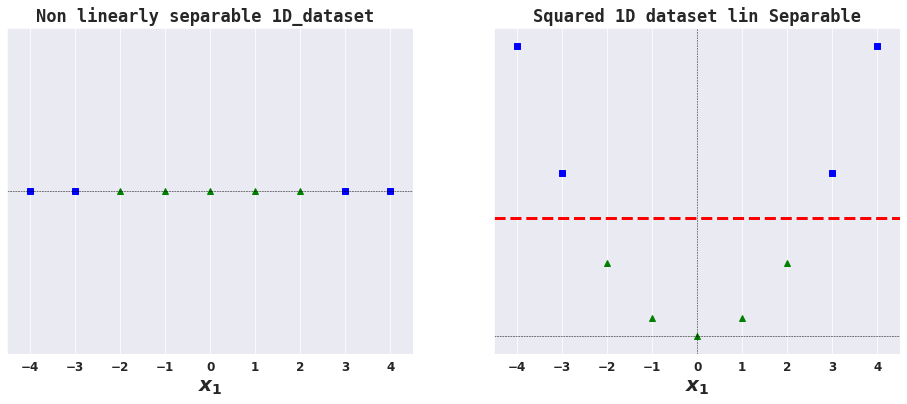

In [ ]:
one_D=np.linspace(-4,4,9).reshape(-1,1) # to get a column not a row
two_D=np.c_[one_D,one_D**2]
y=np.array([0,0,1,1,1,1,1,0,0])
#plot the one dimension dataset:
plt.rcParams["figure.figsize"] = (16,6)
plt.subplot(121)
plt.plot(one_D[:,0][y==0],np.zeros(4),'bs') # np.zeros(4) is a row not a column just to mak sure that it  matches with the X_indexes
plt.xlabel(r"$x_1$", fontsize=20)
plt.plot(one_D[:,0][y==1],np.zeros(5),'g^') # np.zeros(4) is a row not a column just to mak sure that it  matches with the X_indexes
plt.xlabel(r"$x_1$", fontsize=20)
plt.gca().get_yaxis().set_ticks([]) # to delete the yticks
plt.axhline(y=0,ls='--',lw=0.5) # to highlight a line 
plt.title("Non linearly separable 1D_dataset ", fontsize=17,fontdict=font)

plt.axis([-4.5, 4.5, -0.2, 0.2])
plt.subplot(122)
plt.plot(two_D[:,0][y==0],two_D[:,1][y==0],'bs') 
plt.xlabel(r"$x_1$", fontsize=20)
plt.plot(two_D[:,0][y==1],two_D[:,1][y==1],'g^') # np.zeros(4) is a row not a column just to mak sure that it  matches with the X_indexes
plt.xlabel(r"$x_1$", fontsize=20)
plt.gca().get_yaxis().set_ticks([]) # to delete the yticks
plt.axhline(y=0,ls='--',lw=0.5) # to highlight a line 
plt.axvline(x=0,ls='--',lw=0.5) # to highlight a line 
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.title("Squared 1D dataset lin Separable", fontsize=17,fontdict=font)

plt.axis([-4.5, 4.5, -1, 17])

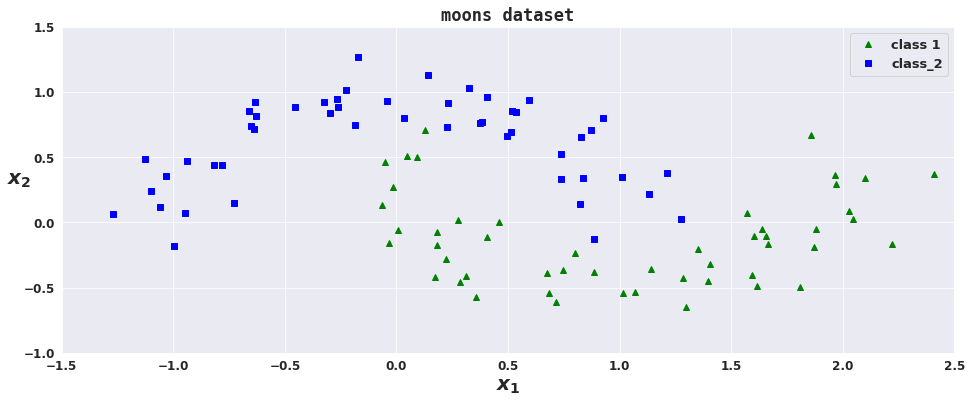

In [ ]:
from sklearn.datasets import make_moons
X, y =make_moons(n_samples=100,noise=0.15,random_state=42) # if we change the noise added the plot will be totally different
def plot_dataset(X,y,class_1_label,class_2_label,axes,title):
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label=class_1_label)
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label=class_2_label)
  plt.legend(loc='best',fontsize=13)
  plt.axis(axes)
  plt.title(title,fontdict=font,fontsize=17)
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plot_dataset(X,y,"class 1","class_2",[-1.5, 2.5, -1, 1.5],"moons dataset")  

In [ ]:
from sklearn.datasets import make_moons
X, y =make_moons(n_samples=100,noise=0.15,random_state=42)
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
polynomial_scaled_clf=Pipeline([
                                ("scaler",StandardScaler()),
                                ("poly_features",PolynomialFeatures(degree=3)),
                                ("linear_svc",LinearSVC(C=10,loss='hinge',random_state=42))])
polynomial_scaled_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear_svc',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.16)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


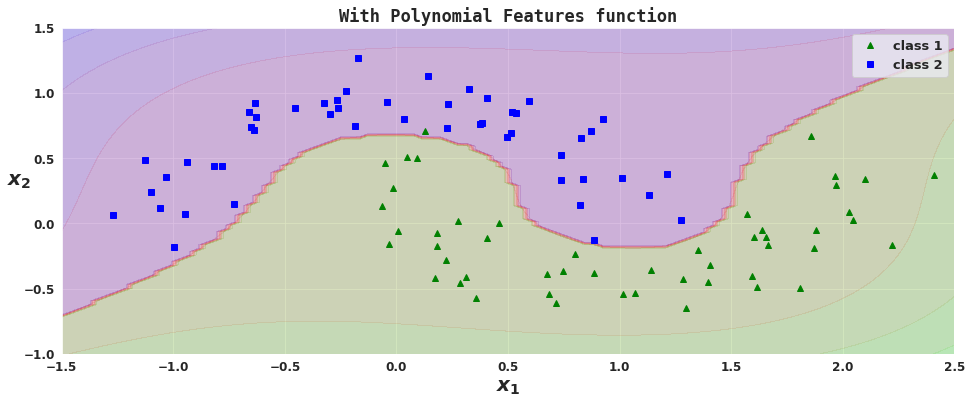

In [ ]:
plot_dataset(X, y,"class 1","class 2", [-1.5, 2.5, -1, 1.5],"With Polynomial Features function")
plot_predictions(polynomial_scaled_clf, [-1.5, 2.5, -1, 1.5])


In [ ]:
# just to clarify to code to generate the last plot
axes=[-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X = np.c_[x0.ravel(), x1.ravel()]
pd.DataFrame(X)

,0,1
0,-1.500000,-1.0
1,-1.459596,-1.0
2,-1.419192,-1.0
3,-1.378788,-1.0
4,-1.338384,-1.0
...,...,...
9995,2.338384,1.5
9996,2.378788,1.5
9997,2.419192,1.5
9998,2.459596,1.5


In [ ]:
y_pred = polynomial_scaled_clf.predict(X).reshape(x0.shape)
pd.DataFrame(y_pred)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_decision = polynomial_scaled_clf.decision_function(X).reshape(x0.shape)
pd.DataFrame(y_decision)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,18.815497,20.196644,21.503624,22.738154,23.901953,24.996736,26.024221,26.986125,27.884166,28.720059,29.495524,30.212275,30.872031,31.476509,32.027425,32.526497,32.975442,33.375977,33.729819,34.038686,34.304293,34.528359,34.712601,34.858735,34.968478,35.043548,35.085663,35.096538,35.077891,35.031439,34.958900,34.861989,34.742425,34.601925,34.442205,34.264983,34.071976,33.864900,33.645474,33.415413,...,29.168670,29.139087,29.138363,29.168216,29.230361,29.326518,29.458402,29.627730,29.836220,30.085589,30.377554,30.713832,31.096141,31.526196,32.005716,32.536417,33.120016,33.758231,34.452779,35.205377,36.017741,36.891590,37.828639,38.830607,39.899210,41.036165,42.243189,43.522000,44.874315,46.301851,47.806324,49.389452,51.052952,52.798541,54.627936,56.542855,58.545014,60.636130,62.817921,65.092104
1,16.822320,18.212053,19.527450,20.770229,21.942107,23.044800,24.080026,25.049501,25.954944,26.798070,27.580598,28.304243,28.970724,29.581758,30.139060,30.644350,31.099342,31.505756,31.865307,32.179714,32.450692,32.679960,32.869233,33.020230,33.134667,33.214262,33.260731,33.275792,33.261162,33.218557,33.149696,33.056294,32.940070,32.802740,32.646021,32.471630,32.281285,32.076703,31.859600,31.631694,...,27.391095,27.359943,27.357480,27.385425,27.445493,27.539403,27.668871,27.835614,28.041350,28.287796,28.576668,28.909684,29.288561,29.715015,30.190765,30.717527,31.297018,31.930955,32.621056,33.369037,34.176616,35.045510,35.977435,36.974109,38.037249,39.168573,40.369796,41.642636,42.988811,44.410038,45.908033,47.484513,49.141196,50.879799,52.702039,54.609633,56.604298,58.687751,60.861710,63.127890
2,14.898707,16.297046,17.620880,18.871926,20.051902,21.162524,22.205509,23.182575,24.095438,24.945816,25.735426,26.465985,27.139210,27.756818,28.320526,28.832051,29.293111,29.705422,30.070702,30.390667,30.667035,30.901523,31.095848,31.251726,31.370876,31.455014,31.505858,31.525123,31.514529,31.475790,31.410626,31.320752,31.207886,31.073745,30.920046,30.748506,30.560843,30.358772,30.144012,29.918280,...,25.684223,25.651520,25.647338,25.673393,25.731404,25.823086,25.950157,26.114335,26.317335,26.560876,26.846674,27.176447,27.551911,27.974784,28.446783,28.969624,29.545026,30.174705,30.860377,31.603761,32.406573,33.270531,34.197351,35.188751,36.246447,37.372157,38.567599,39.834488,41.174542,42.589478,44.081014,45.650865,47.300751,49.032387,50.847490,52.747778,54.734968,56.810777,58.976922,61.235120
3,13.043206,14.450170,15.782460,17.041793,18.229885,19.348455,20.399219,21.383894,22.304197,23.161846,23.958557,24.696048,25.376036,26.000237,26.570370,27.088150,27.555296,27.973523,28.344550,28.670093,28.951870,29.191597,29.390992,29.551772,29.675653,29.764354,29.819590,29.843080,29.836539,29.801686,29.740238,29.653911,29.544422,29.413489,29.262829,29.094159,28.909196,28.709656,28.497258,28.273718,...,24.046602,24.012368,24.006485,24.030670,24.086641,24.176115,24.300808,24.462439,24.662723,24.903378,25.186121,25.512670,25.884741,26.304051,26.772318,27.291258,27.862589,28.488027,29.169291,29.908097,30.706161,31.565202,32.486936,33.473080,34.525352,35.645468,36.835146,38.096102,39.430054,40.838720,42.323815,43.887057,45.530163,47.254851,49.062837,50.955838,52.935572,55.003756,57.162106,59.412340
4,11.254367,12.669975,14.010739,15.278377,16.474606,17.601142,18.659703,19.652007,20.579769,21.444707,22.248539,22.992981,23.679751,24.310565,24.887140,25.411195,25.884445,26.308608,26.685401,27.016541,27.303746,27.548731,27.753215,27.918915,28.047547,28.140829,28.200477,28.228209,28.225743,28.194794,28.137080,28.054319,27.948227,27.820521,27.672919,27.507137,27.324893,27.127904,26.917886,26.696558,...,22.476781,22.441034,22.433469,22.455804,22.509754,22.597038,22.719373,22.878475,23.076062,23.313850,23.593558,23.916901,24.285597,24.70

**Polynomial Kernel**

 Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.


**Fortunately, when using SVMs you can apply an almost miraculous mathematical
technique called the kernel trick**.

 It makes it possible to
get the same result as if you added many polynomial features, even with very high-
degree polynomials, without actually having to add them. So there is no combinato‐
rial explosion of the number of features since you don’t actually add any features. This
trick is implemented by the SVC class. Let’s test it on the moons dataset



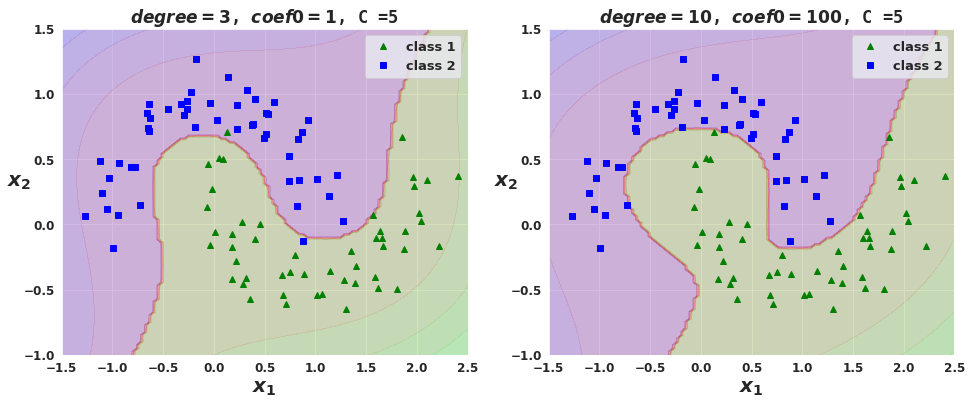

In [ ]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,noise=0.15,random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
for d,r,p in ((3,1,121),(10,100,122)):
  plt.subplot(p)
  poly_kernel_scaled_clf=Pipeline([
                                ("scaler",StandardScaler()),
                                ("poly_kernel",SVC(kernel="poly",C=5,degree=d,coef0=r))])
  poly_kernel_scaled_clf.fit(X,y)
  plot_dataset(X, y,"class 1","class 2", [-1.5, 2.5, -1, 1.5],"$degree = {}$".format(d)+", $coef0 = {}$".format(r)+", C =5" )
  plot_predictions(poly_kernel_scaled_clf, [-1.5, 2.5, -1, 1.5])

Obviously, if your model is overfitting, you might want to
reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing
it. The hyperparameter **coef0** controls how much the model is influenced by high-
degree polynomials versus low-degree polynomials

A common approach to find the right hyperparameter values is to
use grid search (see Chapter 2). It is often faster to first do a very
coarse grid search, then a finer grid search around the best values
found. Having a good sense of what each hyperparameter actually
does can also help you search in the right part of the hyperparame‐
ter space.

### Adding Similarity Features:

 Another technique to tackle nonlinear problems is to add features computed using a
similarity function that measures how much each instance resembles a particular
landmark. For example, let’s take the one-dimensional dataset discussed earlier and
add two landmarks to it at x 1 = –2 and x 1 = 1 (see the left plot). Next,
let’s define the similarity function to be the Gaussian Radial Basis Function (RBF)
with γ = 0.3
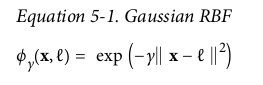


Now we are ready to compute the new features. For example, let’s look
at the instance x 1 = –1: it is located at a distance of 1 from the first landmark, and 2
from the second landmark. Therefore its new features are x2 = exp (–0.3 × 12) ≈ 0.74
and x3 = exp (–0.3 × 2 2) ≈ 0.30. The plot on the right shows the transformed dataset (dropping the original features). As you can see, it is now linearly
separable.

In [ ]:
def plot_gaussian_RBF(gamma,l,style):
  x=np.linspace(-4,4,100)
  y=np.exp(-gamma*((x-l)**2))
  plt.plot(x,y,style)
  plt.axhline(y=0,ls='--',lw=0.5) 
  plt.title("Similarity features",fontdict=font,fontsize=17)
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel("similarity", fontsize=20, rotation=90)
  plt.plot(l,0,'y')
  plt.annotate(r"$landmark$",xy=(l,1),xytext=(l-0.4,0.89),fontsize=14,
                   arrowprops=dict(arrowstyle='->',ec='red',lw=0.3),bbox=dict(boxstyle="round",fc='red'))

In [ ]:
def gaussian_RBF(gamma,l,input_feature):
  list_input_feature=input_feature.tolist()
  y=np.array([np.exp(-gamma*((x[0]-l)**2)) for x in list_input_feature ])
  return y 


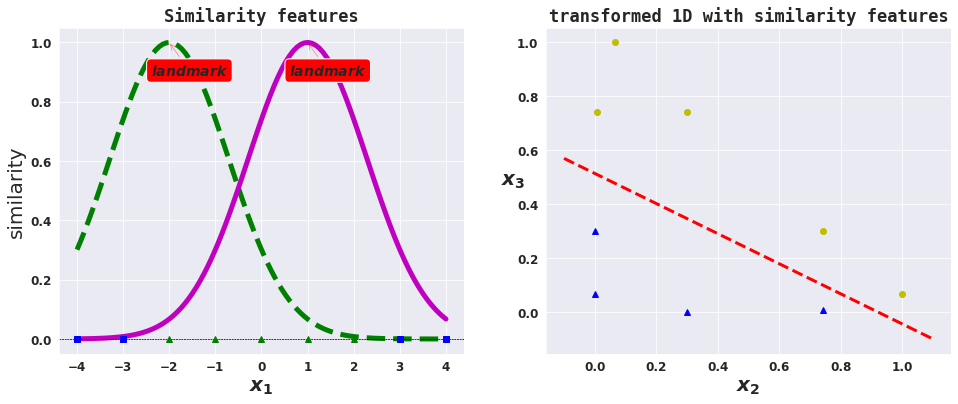

In [ ]:
plt.subplot(121)
plot_gaussian_RBF(0.3,-2,'g--')
plot_gaussian_RBF(0.3,1,'m-')
# plot the 1_D dataset:
plt.plot(one_D[:,0][y==0],np.zeros(4),'bs') # np.zeros(4) is a row not a column just to mak sure that it  matches with the X_indexes
plt.plot(one_D[:,0][y==1],np.zeros(5),'g^') # np.zeros(4) is a row not a column just to mak sure that it  matches with the X_indexes
plt.subplot(122)
dist_from_l1=np.array([gaussian_RBF(0.3,-2,one_D)]).reshape(-1,1)
dist_from_l2=np.array([gaussian_RBF(0.3,1,one_D)]).reshape(-1,1)
with_similarity_features=np.c_[one_D,dist_from_l1,dist_from_l2]
plt.plot(with_similarity_features[:,1:2][y==0],with_similarity_features[:,2:][y==0],'b^')
plt.plot(with_similarity_features[:,1:2][y==1],with_similarity_features[:,2:][y==1],'yo')
plt.title("transformed 1D with similarity features",fontdict=font,fontsize=17)
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$", fontsize=20,rotation=0)
# the dicision boundary:
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)

You may wonder how to select the landmarks. The simplest approach is to create a
landmark at the location of each and every instance in the dataset. This creates many
dimensions and thus increases the chances that the transformed training set will be
linearly separable. The downside is that a training set with m instances and n features
gets transformed into a training set with m instances and m features (assuming you
drop the original features). If your training set is very large, you end up with an
equally large number of features.

### Gaussian RBF Kernel

 Just like the polynomial features method, the similarity features method can be useful
with any Machine Learning algorithm, but it may be computationally expensive to
compute all the additional features, especially on large training sets. However, once
again the kernel trick does its SVM magic: it makes it possible to obtain a similar
result as if you had added many similarity features, without actually having to add
them. Let’s try the Gaussian RBF kernel using the SVC class

In [ ]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,noise=0.15,random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
RBF_kernel_clf=Pipeline([("scaler",StandardScaler()),
                          ("RBF_kernel_svc",SVC(kernel='rbf',gamma=5,C=0.001))
                          ])
RBF_kernel_clf.fit(X,y) 

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RBF_kernel_svc',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

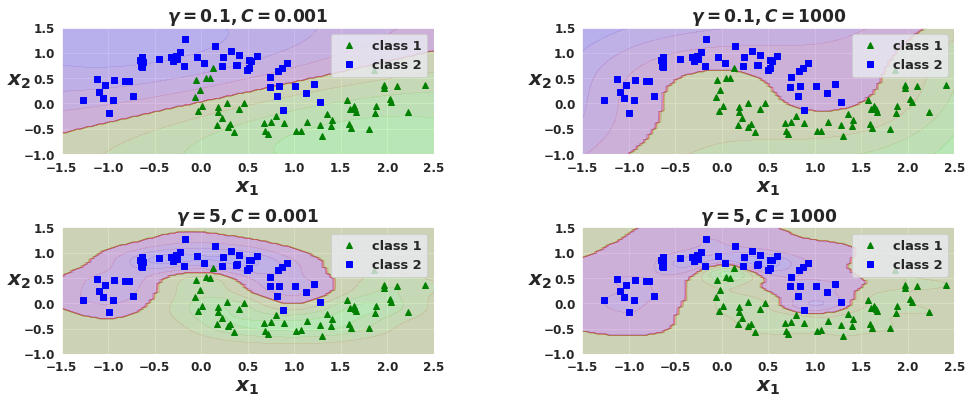

In [ ]:
for c,gama,param in ((0.001,0.1,221),(1000,0.1,222),(0.001,5,223),(1000,5,224)):
  plt.subplot(param)
  rbf_clf=Pipeline([("scaler",StandardScaler()),
                          ("RBF_kernel_svc",SVC(kernel='rbf',gamma=gama,C=c))
                          ])
  rbf_clf.fit(X,y) 
  plot_dataset(X,y,"class 1","class 2",[-1.5,2.5,-1,1.5],r"$\gamma = {}, C = {}$".format(gama, c))
  plot_predictions(rbf_clf,[-1.5,2.5,-1,1.5])
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.58)


Other kernels exist but are used much more rarely. For example, some kernels are
specialized for specific data structures. String kernels are sometimes used when classi‐
fying text documents or DNA sequences (e.g., using the string subsequence kernel or
kernels based on the Levenshtein distance).
With so many kernels to choose from, how can you decide which
one to use? As a rule of thumb, you should always try the linear
kernel first (remember that LinearSVC is much faster than SVC(ker
nel="linear") ), especially if the training set is very large or if it
has plenty of features. If the training set is not too large, you should
try the Gaussian RBF kernel as well; it works well in most cases.
Then if you have spare time and computing power, you can also
experiment with a few other kernels using cross-validation and grid
search, especially if there are kernels specialized for your training
set’s data structure.

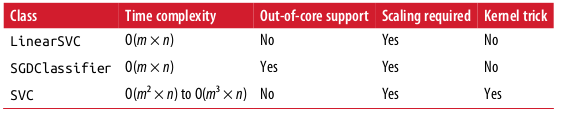

## SVM Regression:
As we mentioned earlier, the SVM algorithm is quite versatile: not only does it sup‐
port linear and nonlinear classification, but it also supports linear and nonlinear
regression. The trick is to reverse the objective: instead of trying to fit the largest pos‐
sible street between two classes while limiting margin violations, SVM Regression
tries to fit as many instances as possible on the street while limiting margin violations
(i.e., instances off the street). The width of the street is controlled by a hyperparame‐
ter ε . Figure shows two linear SVM Regression models trained on some random
linear data, one with a large margin ( ε = 1.5) and the other with a small margin ( ε =
0.5).


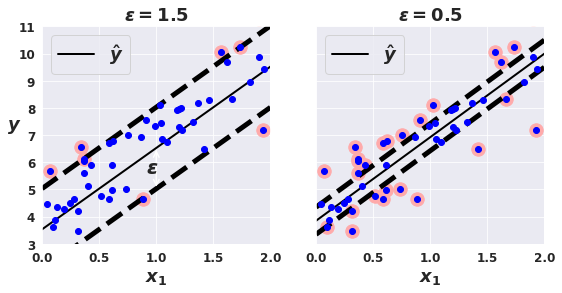

In [ ]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

from sklearn.svm import LinearSVR
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5} )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

<function matplotlib.pyplot.show>

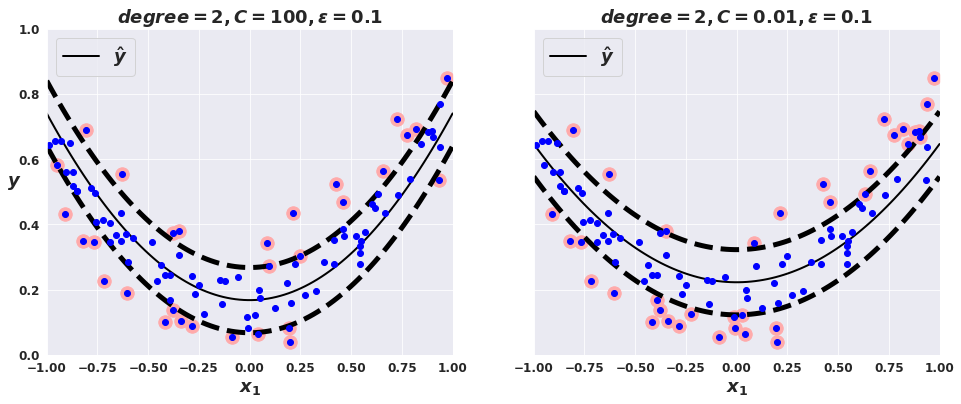

In [ ]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

# generate X,y
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

from sklearn.svm import SVR
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show